# **UJIAN TENGAH SEMESTER GANJIL 2024/2025**



---



##**1. Mengimpor Library dan Dataset yang diperlukan**

###**1.1 Impor Library**

In [ ]:
import warnings

import os
import math
import numpy as np
import pandas as pd
from IPython.display import display
from google.colab import drive

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#Mengatur format gambar menjadi retina, sehingga grafik lebih tajam dan berkualitas tinggi
%config InlineBackend.figure_format = 'retina'

***Penjelasan:***
*   **warnings** untuk mengabaikan peringatan yang tidak terlalu penting agar output lebih bersih dan mudah dibaca.
*   **os** untuk berinteraksi dengan sistem operasi, seperti mengakses file atau direktori di sistem.
*   **math** untuk melakukan operasi matematika dasar
*   **numpy** (disingkat np) untuk komputasi numerik pada array dan matriks, yang berguna dalam analisis data
*   **pandas** (disingkat pd) yang menyediakan struktur data dan fungsi analisis data seperti DataFrame untuk mengelola dataset
*   fungsi **display dari IPython** untuk menampilkan DataFrame dan objek lainnya dalam format yang lebih rapi dan interaktif
*   modul **drive dari google.colab** untuk menghubungkan Google Colab dengan Google Drive, sehingga kita dapat mengakses file di Drive
*   **matplotlib.pyplot** (disingkat plt) sebagai dasar untuk membuat visualisasi data, grafik, dan plot
*   **seaborn** (disingkat sns) yang merupakan library visualisasi yang dibangun di atas matplotlib dengan gaya default yang lebih menarik dan informatif

###**1.2 Impor Dataset**
Dataset berjudul "[Early Stage Diabetes Risk Prediction](https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset)" ini bertujuan untuk mengidentifikasi tanda dan gejala awal diabetes pada pasien yang baru didiagnosis atau berisiko. Terdiri dari 520 sampel dengan 17 fitur yang meliputi demografi seperti usia dan jenis kelamin, serta gejala biner seperti polidipsia, poliuria, dan perubahan berat badan tiba-tiba. Dataset ini dirancang untuk tugas klasifikasi, dengan tujuan utama membedakan pasien yang mungkin berisiko diabetes tahap awal berdasarkan gejala yang ada.

In [ ]:
# Mengakses dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/diabetes_data_upload.csv"
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama pada dataset
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# Mendefinisikan deskripsi fitur secara manual
descriptions = {
    'Age': 'Usia pasien',
    'Gender': 'Jenis kelamin pasien',
    'Polyuria': 'Apakah mengalami poliuria (sering berkemih)?',
    'Polydipsia': 'Apakah mengalami polidipsia (haus berlebihan)?',
    'sudden weight loss': 'Apakah mengalami penurunan berat badan yang tiba-tiba?',
    'weakness': 'Apakah merasa lemah?',
    'Polyphagia': 'Apakah mengalami poli-fagia (nafsu makan berlebihan)?',
    'Genital thrush': 'Apakah mengalami thrush genital?',
    'visual blurring': 'Apakah mengalami penglihatan kabur?',
    'Itching': 'Apakah mengalami gatal?',
    'Irritability': 'Apakah mengalami iritabilitas?',
    'delayed healing': 'Apakah mengalami penyembuhan yang lambat?',
    'partial paresis': 'Apakah mengalami parese parsial?',
    'muscle stiffness': 'Apakah mengalami kekakuan otot?',
    'Alopecia': 'Apakah mengalami alopecia (kerontokan rambut)?',
    'Obesity': 'Apakah mengalami obesitas?',
    'class': 'Status diabetes (positif/negatif)'
}

# Mengambil nama kolom dari DataFrame
feature_names = df.columns.tolist()

# Menentukan Value Type dan Statistical Type secara manual
value_types = ['Integer', 'Categorical', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary',
               'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Categorical']

statistical_types = ['Quantitative', 'Categorical', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary',
                     'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary',
                     'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical/Binary', 'Categorical']

# Membuat DataFrame dari data
feature_description = pd.DataFrame({
    'Name': feature_names,
    'Description': [descriptions[name] for name in feature_names],
    'Value Type': value_types,
    'Statistical Type': statistical_types
})

# Menampilkan tabel
display(feature_description)

,Name,Description,Value Type,Statistical Type
0,Age,Usia pasien,Integer,Quantitative
1,Gender,Jenis kelamin pasien,Categorical,Categorical
2,Polyuria,Apakah mengalami poliuria (sering berkemih)?,Binary,Categorical/Binary
3,Polydipsia,Apakah mengalami polidipsia (haus berlebihan)?,Binary,Categorical/Binary
4,sudden weight loss,Apakah mengalami penurunan berat badan yang ti...,Binary,Categorical/Binary
5,weakness,Apakah merasa lemah?,Binary,Categorical/Binary
6,Polyphagia,Apakah mengalami poli-fagia (nafsu makan berle...,Binary,Categorical/Binary
7,Genital thrush,Apakah mengalami thrush genital?,Binary,Categorical/Binary
8,visual blurring,Apakah mengalami penglihatan kabur?,Binary,Categorical/Binary
9,Itching,Apakah mengalami gatal?,Binary,Categorical/Binary


##**2. Univariate Visualization Analysis**

###**2.1 Quantitative Features**


**1.   Histogram**

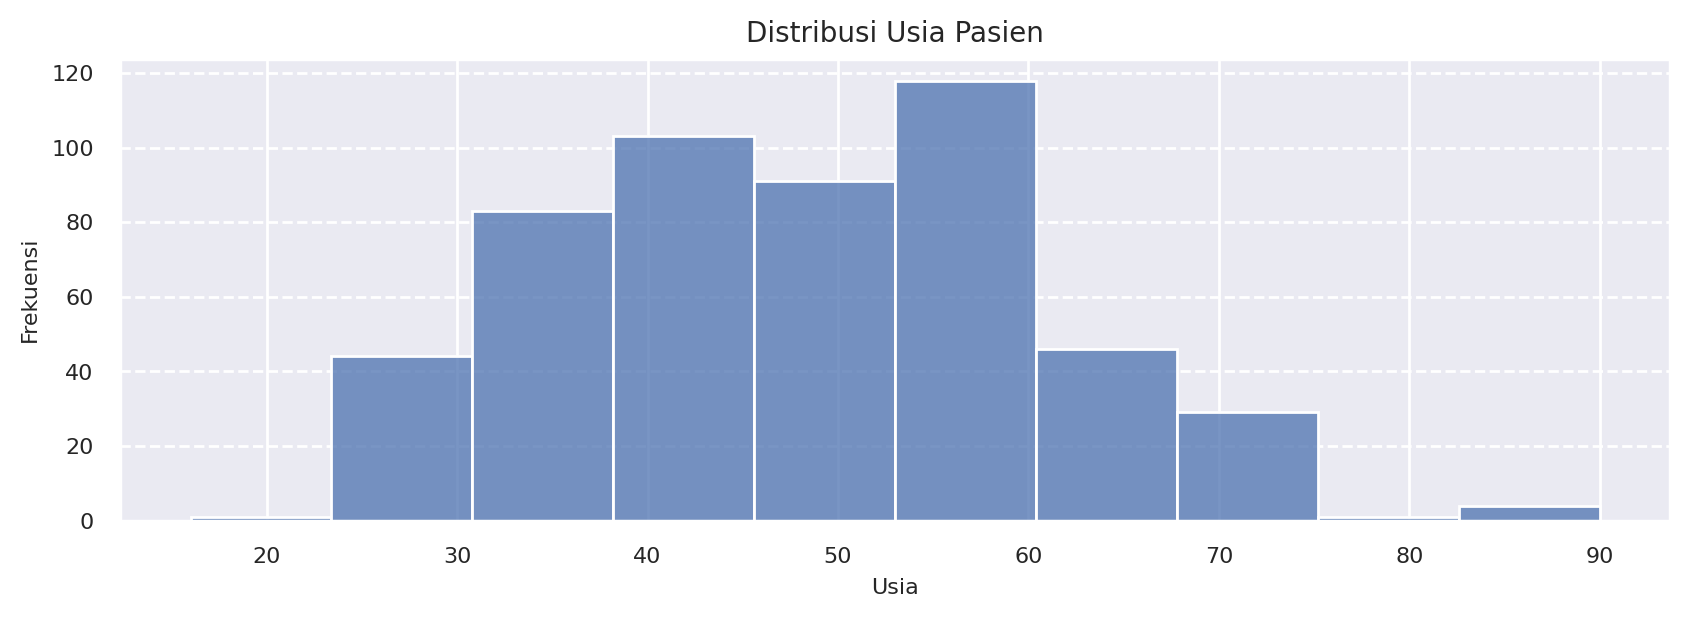

In [ ]:
# Visualisasi Histogram
plt.figure(figsize=(10, 3))
sns.histplot(df['Age'], bins=10)
plt.title('Distribusi Usia Pasien', fontsize=10)
plt.xlabel('Usia',fontsize=8)
plt.ylabel('Frekuensi', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.show()

***Penjelasan atau Deskripsi:***

Histogram di atas menunjukkan distribusi frekuensi dari variabel usia pasien dalam dataset yang dikelompokkan kedalam interval atau bin 10 dengan tinggi setiap batang mewakili jumlah pasien dalam rentang usia tertentu. Dari grafik Histogram tersebut terlihat bahwa sebagian besar pasien berada dalam rentang usia 30 hingga 60 tahun, dengan puncak frekuensi tertinggi pada usia rentang sekitar 50 - 60 tahun yang menunjukkan bahwa kelompok usia menengah lebih dominan dalam data ini. Histogram ini membantu mengidentifikasi pola distribusi usia pasien dengan cepat. Informasi mengenai distribusi ini sangat penting dalam memahami distribusi usia yang juga dapat membantu dalam interpretasi hasil analisis lanjutan mengenai prevalensi kondisi kesehatan atau penyakit tertentu dalam rentang usia tertentu.

**2.   Density plot atau plot kepadatan**

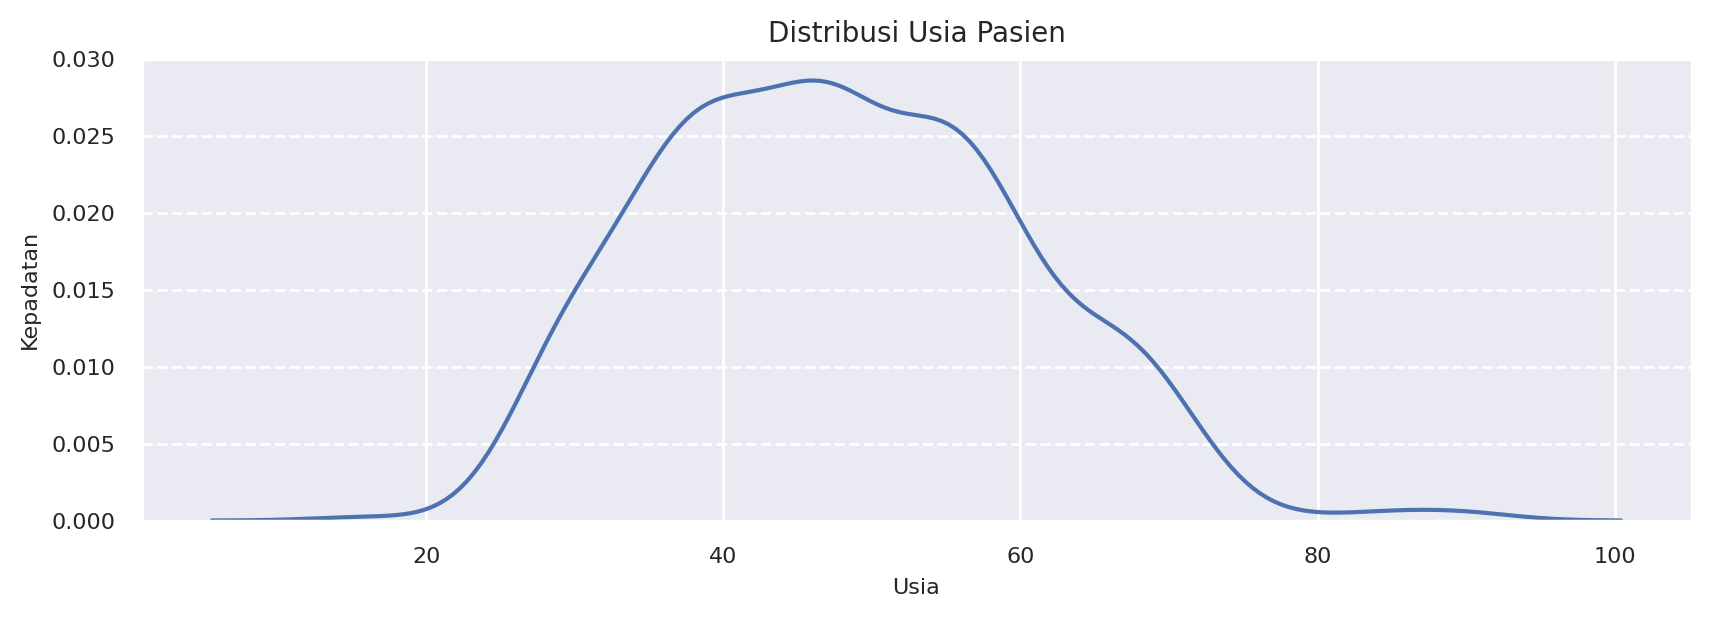

In [ ]:
# Visualisasi Density
plt.figure(figsize=(10, 3))
sns.kdeplot(df['Age'])
plt.title('Distribusi Usia Pasien', fontsize=10)
plt.xlabel('Usia', fontsize=8)
plt.ylabel('Kepadatan', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.show()

***Penjelasan atau Deskripsi:***

Grafik density (kepadatan) diatas menunjukkan puncak utama di sekitar usia 50 tahun yang mengindikasikan mayoritas pasien berada dalam rentang usia paruh baya hingga awal lansia. Data tersebar dari sekitar usia 0 hingga lebih dari 100 tahun, namun sebagian besar terkonsentrasi antara 20-80 tahun. Informasi ini dapat membantu dalam pemahaman mengenai demografi utama pasien, yang mungkin relevan untuk pengambilan keputusan atau analisis kesehatan lebih lanjut.

**3.   Boxplot**

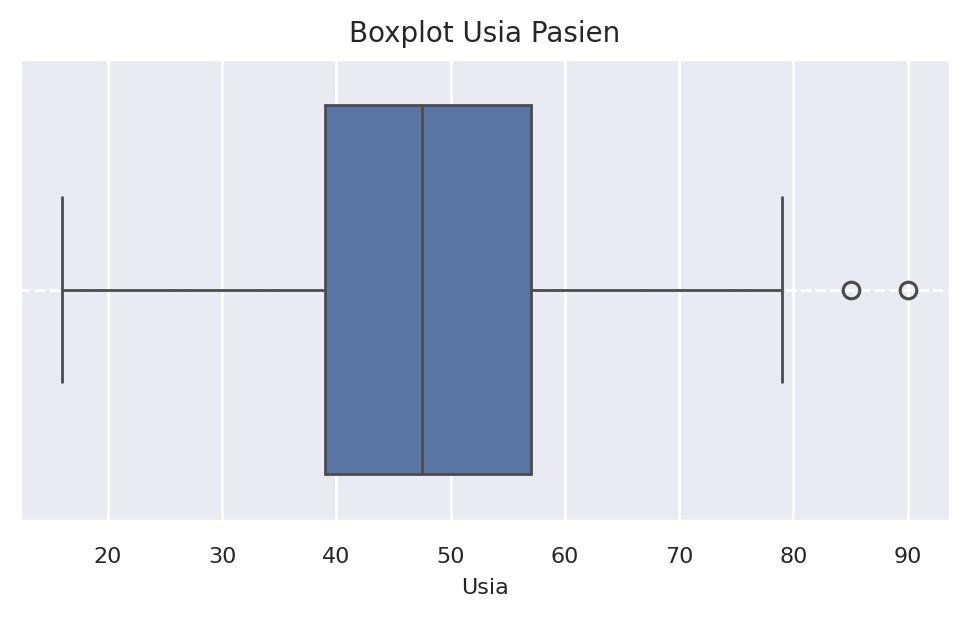

In [ ]:
# Visualisasi Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x="Age", data=df)
plt.title('Boxplot Usia Pasien', fontsize=10)
plt.xlabel('Usia', fontsize=8)
plt.grid(axis='y', linestyle='--')
plt.xticks(fontsize=8)
plt.show()

***Penjelasan atau Deskripsi:***

Grafik diatas merupakan Boxplot yang menunjukkan distribusi usia pasien dalam dataset. Berikut rincian penjelasan dari Boxplot diatas.
1. Garis di dalam box biru menunjukkan median atau nilai tengah dari distribusi usia, yang terlihat bahwa median usia pasien berada di sekitar usia 50 tahun yang berarti separuh pasien berusia di bawah 50 tahun, dan separuh lainnya berusia di atasnya.
2. Rentang dari box biru menggambarkan IQR (Interquartile Range) yaitu jarak antara kuartil pertama (Q1, sekitar 40 tahun) dan kuartil ketiga (Q3, sekitar 55 tahun).
3. Garis whisker (garis extrem) menunjukkan sebaran usia pasien yang berada dalam IQR dari Q1 ke Q3. Di sisi kiri, whisker menunjukkan batas bawah usia pasien dibawah usia 20 tahun, sedangkan whisker di sisi kanan mendekati usia 80 tahun. Hal tersebut mengartikan sebagian besar usia pasien berada dalam rentang ini.
4. Titik-titik di luar garis whisker (sebelah kanan) adalah outliers yang menunjukkan pasien dengan usia yang jauh lebih tua dari mayoritas, yaitu sekitar usia 80 dan 90 tahun, yang menunjukkan variasi usia yang signifikan dalam dataset.

Boxplot ini membantu mengidentifikasi bahwa dataset mencakup pasien dengan rentang usia yang luas, namun mayoritas berada di usia menengah (40-55 tahun). Informasi tersebut dapat digunakan untuk analisis lebih lanjut karena usia bisa menjadi faktor risiko dalam diagnosis diabetes.

**4.   Statistik Deskriptif**


In [ ]:
# Menghitung statistik deskriptif untuk fitur kuantitatif
stats = df['Age'].describe().astype(int)  # Mengonversi hasil menjadi integer
print("Statistik Deskriptif untuk Usia (Age):")
stats

Statistik Deskriptif untuk Usia (Age):


,Age
count,520
mean,48
std,12
min,16
25%,39
50%,47
75%,57
max,90


***Penjelasan atau Deskripsi:***

Statistik deskriptif usia diatas sesuai dengan grafik histogram, density, dan boxplot yang sudah ada sebelumnya. Rata-rata usia 48 tahun dan median 47 tahun mencerminkan simetri yang terlihat pada density dan histogram yang berpusat di sekitar usia paruh baya. Standar deviasi 12 menunjukkan penyebaran data yang tidak terlalu lebar, sesuai dengan histogram yang menunjukkan distribusi terkonsentrasi antara 30 hingga 60 tahun. Rentang usia dari 16 hingga 90 tahun, dengan kuartil pertama di 39 dan kuartil ketiga di 57, tercermin pada boxplot yang menunjukkan rentang utama di antara dua kuartil ini, dengan sedikit outliers di usia yang lebih muda dan lebih tua, menguatkan distribusi usia yang stabil pada kelompok tengah.

###**2.2 Categorical Features**

**1.   Tabel Frekuensi**

In [ ]:
# Membuat Tabel Frekuensi untuk fitur 'Class'
df["class"].value_counts()

,count
class,
Positive,320
Negative,200


***Penjelasan atau Deskripsi:***

Tabel frekuensi untuk fitur 'Class' diatas menunjukkan distribusi hasil akhir dari dataset, di mana terdapat 320 pasien yang terklasifikasi sebagai Positive (berisiko diabetes) dan 200 pasien sebagai Negative (tidak berisiko diabetes).

**2.   Barplot**

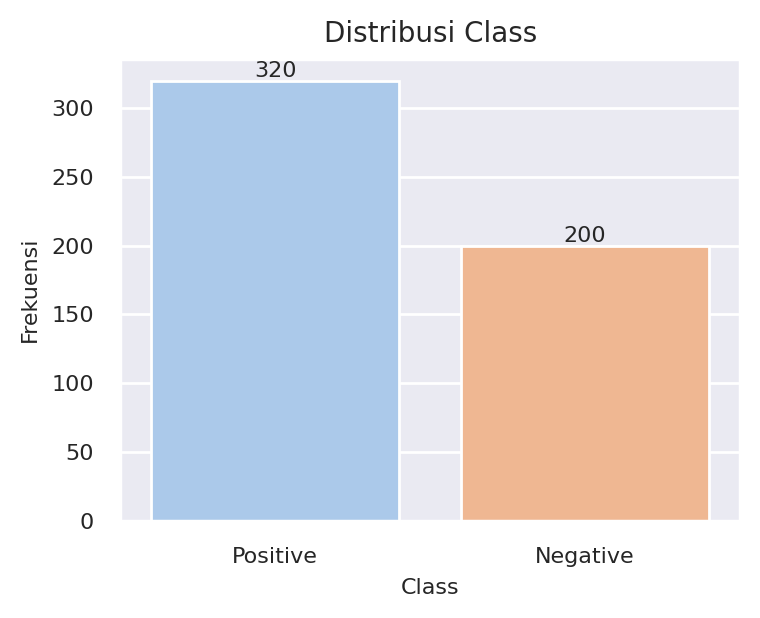

In [ ]:
#Visualisasi dengan Bar Plot
# Mengatur ukuran figure
plt.figure(figsize=(4, 3))

# Menghitung frekuensi untuk fitur 'Class'
sns.countplot(data=df, x='class', palette='pastel')

# Menambahkan judul dan label
plt.title('Distribusi Class', fontsize=10)
plt.xlabel('Class', fontsize=8)
plt.ylabel('Frekuensi', fontsize=8)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)


# Menambahkan angka di atas setiap bar
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=8)

plt.show()

***Penjelasan atau Deskripsi:***

Bar plot untuk fitur 'Class' diatas menampilkan jumlah pasien berisiko diabetes (Positive) sebanyak 320 dan pasien tidak berisiko (Negative) sebanyak 200, memberikan visualisasi yang jelas mengenai distribusi data. Grafik ini menunjukkan proporsi yang lebih besar dari pasien berisiko, dengan representasi visual yang memudahkan pemahaman perbandingan antara kedua kategori.

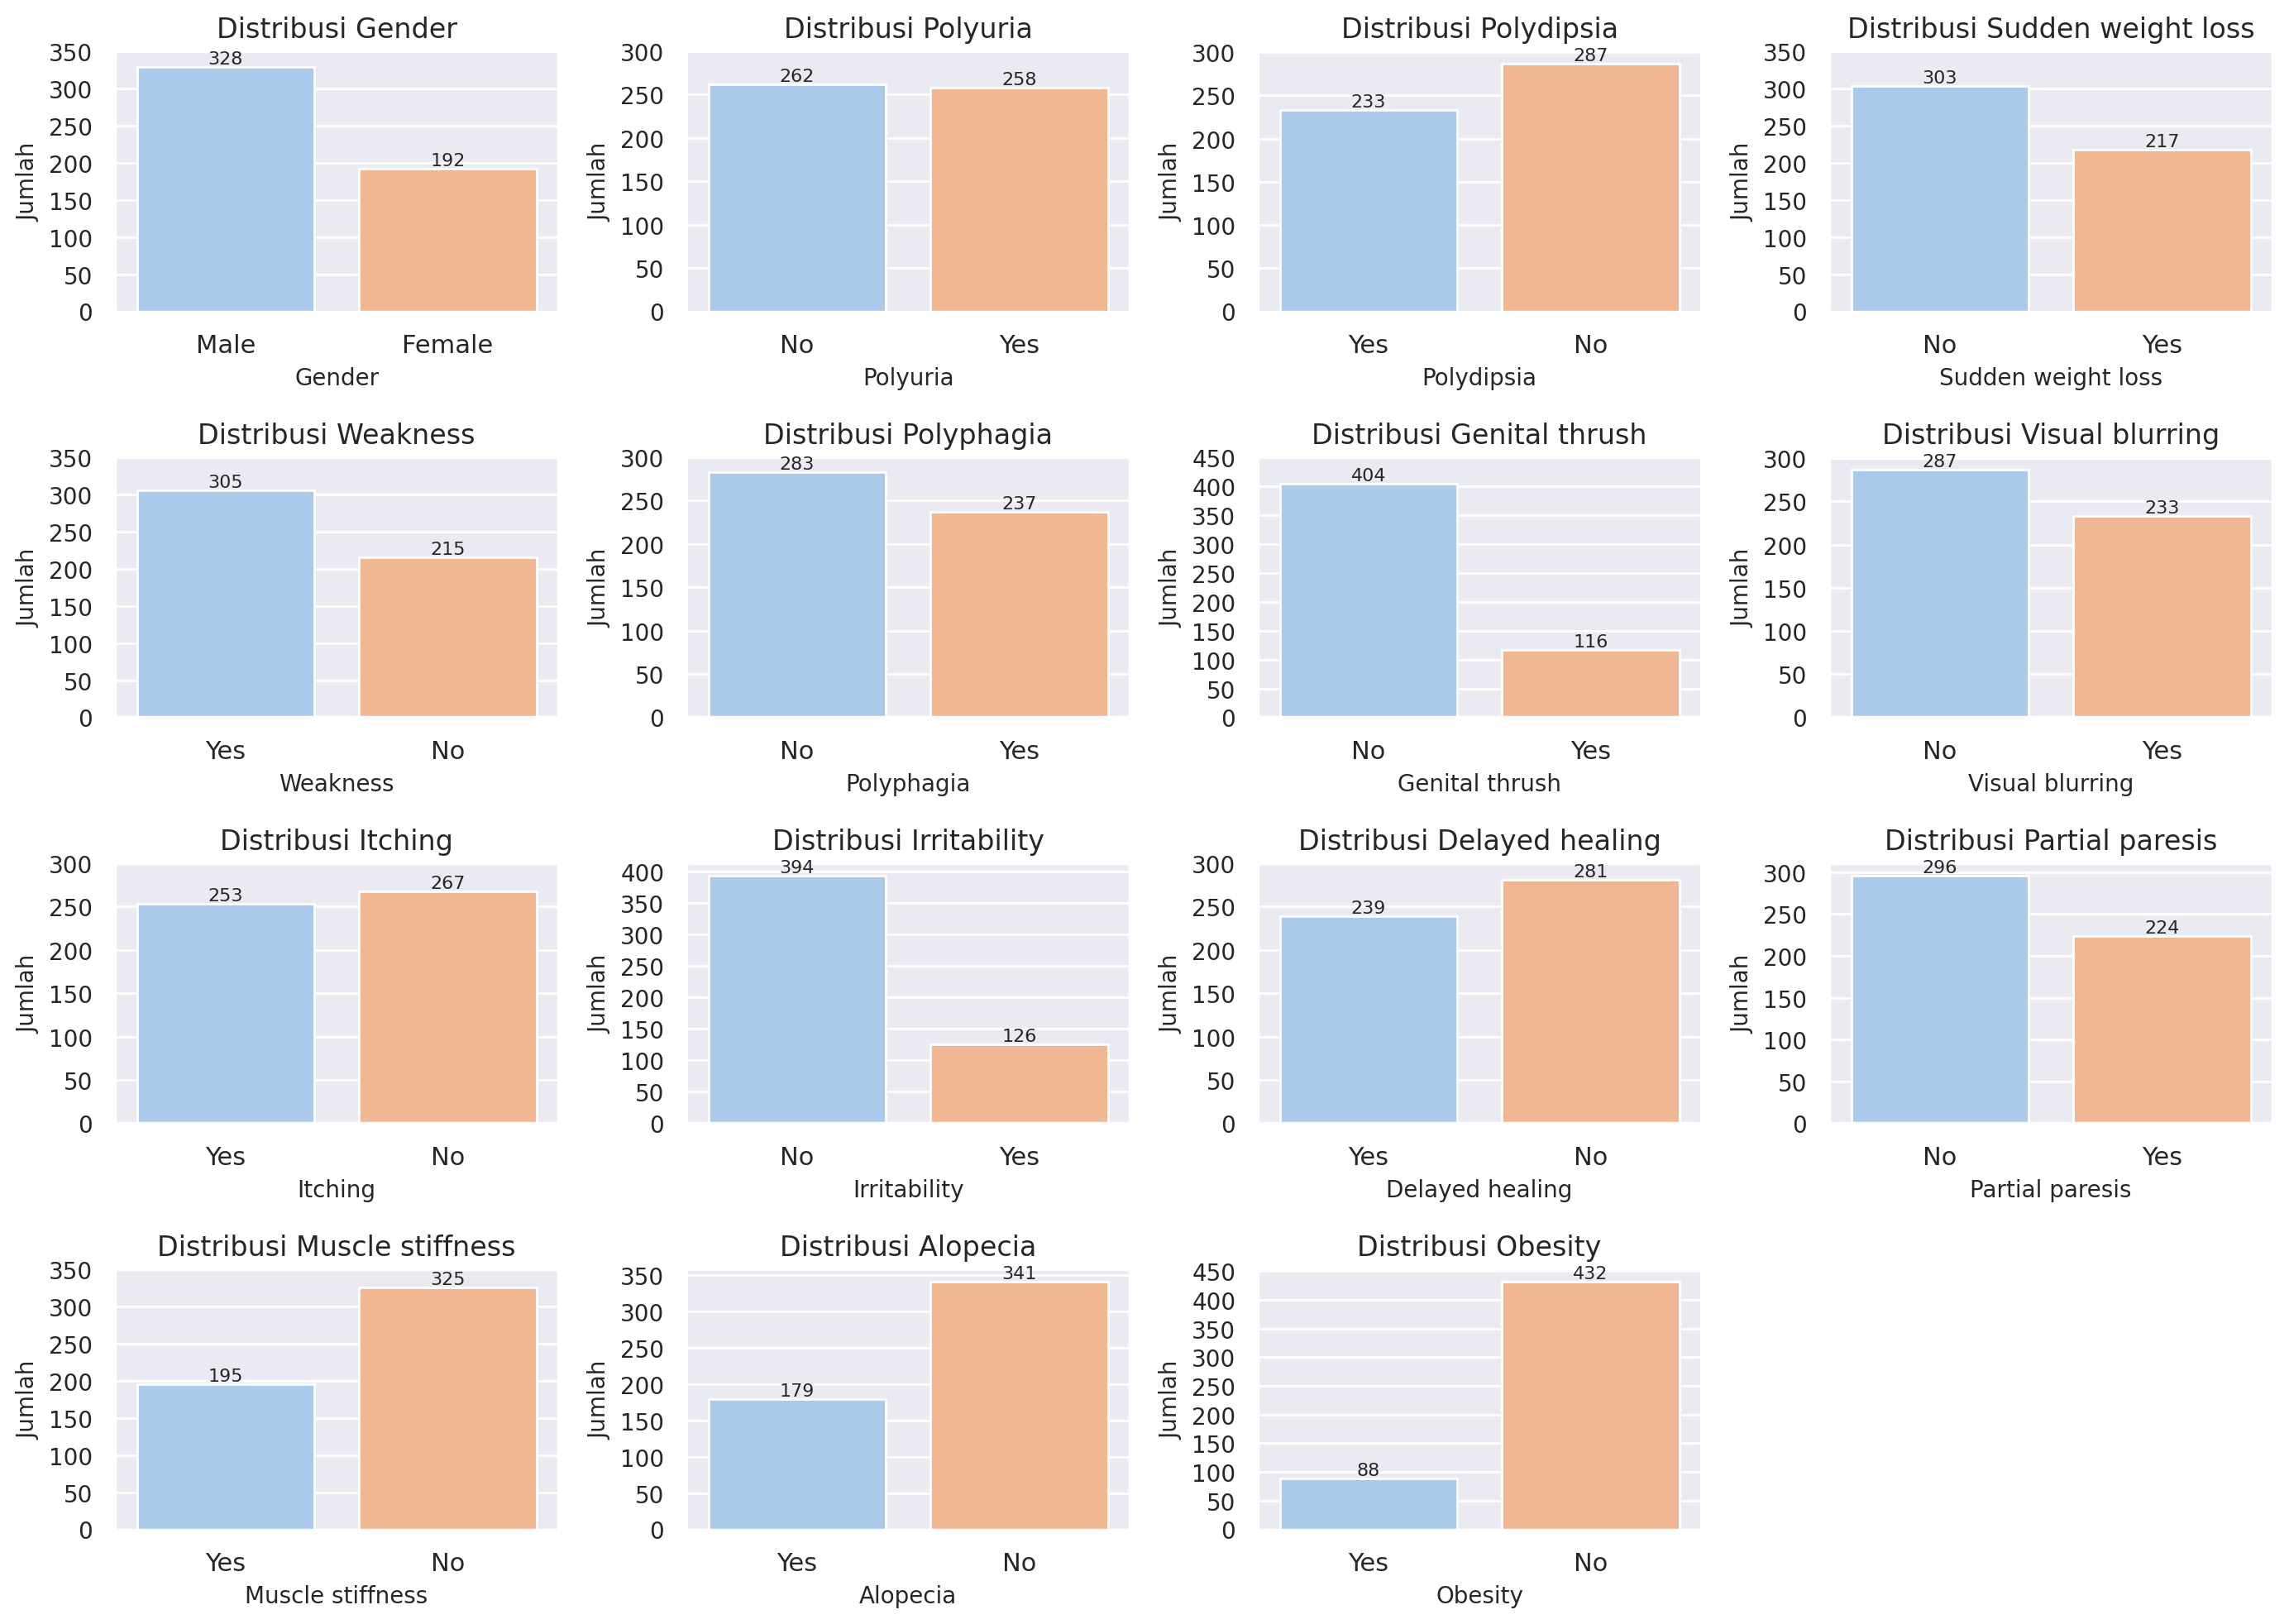

In [ ]:
# Fitur kategorikal yang akan divisualisasikan
categorical_features = [
    'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
    'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
    'Itching', 'Irritability', 'delayed healing', 'partial paresis',
    'muscle stiffness', 'Alopecia', 'Obesity'
]

# Menentukan jumlah baris yang diperlukan
n_rows = int(np.ceil(len(categorical_features) / 4))

fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(14, 10))

axes = axes.flatten()

# Loop untuk membuat countplots untuk setiap fitur kategorikal
for idx, feature in enumerate(categorical_features):
    ax = axes[idx]

    # Membuat countplot
    sns.countplot(x=feature, data=df, ax=ax, palette='pastel')

    # Menambahkan judul dan label
    ax.set_title(f'Distribusi {feature.capitalize()}', fontsize=12)
    ax.set_xlabel(feature.capitalize(), fontsize=10)
    ax.set_ylabel('Jumlah', fontsize=10)

    # Menambahkan angka di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8)

    # mengatur rentang sumbu Y agar mudah dibaca
    max_count = df[feature].value_counts().max()
    ax.set_yticks(np.arange(0, max_count + 50, 50))
    ax.set_yticklabels(np.arange(0, max_count + 50, 50), fontsize=10)

for i in range(len(categorical_features), n_rows * 4):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.show()

***Penjelasan atau Deskripsi:***

Grafik bar diatas menunjukkan distribusi fitur kategorikal yang ada pada dataset, di mana secara **Gender (jenis kelamin)** 328 pasien laki-laki (63%) mendominasi dibandingkan dengan 192 pasien perempuan (37%). **Frekuensi poliuria** hampir seimbang, dengan 262 pasien tidak mengalami gejala ini dan 258 pasien mengalaminya. **Polidipsia** terlihat pada 233 pasien, sedangkan 287 pasien lainnya tidak. **Penurunan berat badan tiba-tiba** dialami oleh 217 pasien, sementara 303 pasien tidak mengalaminya. **Gejala kelemahan** (305 pasien) dan **polyphagia** (237 pasien) cukup umum, sedangkan **genital thrush** (116 pasien) dan **iritabilitas** (126 pasien) jarang terjadi. Masalah **penglihatan kabur** terdapat pada 233 pasien, sedangkan 267 pasien tidak mengalaminya. **Gatal** dialami oleh 253 pasien, dan **kesulitan dalam penyembuhan** serta **paresis parsial** masing-masing dialami oleh 239 dan 224 pasien. **Kekakuan otot** terjadi pada 195 pasien, sedangkan **kerontokan rambut** dialami oleh 179 pasien. Terakhir, **obesitas jarang terjadi**, hanya dialami oleh 88 pasien dari total 520 pasien.

##**3. Multivariate Visualization Analysis**


###**3.1 Quantitative vs. Quantitative**

Pada Multivariate Visualization Analysis ini, pertama yang dapat dilakukan adalah berfokus pada hubungan antara variabel-variabel numerik dalam dataset. Namun, pada dataset ini hanya 1 fitur yang bersifat numerik yakni fitur Age atau usia. Sehingga solusi yang dapat dilakukan adalah mengubah beberapa fitur biner menjadi representasi numerik untuk memungkinkan analisis yang lebih mendalam, yakni Yes/No menjadi 1/0.  

**1.   Correlation Matrix**

<Axes: >

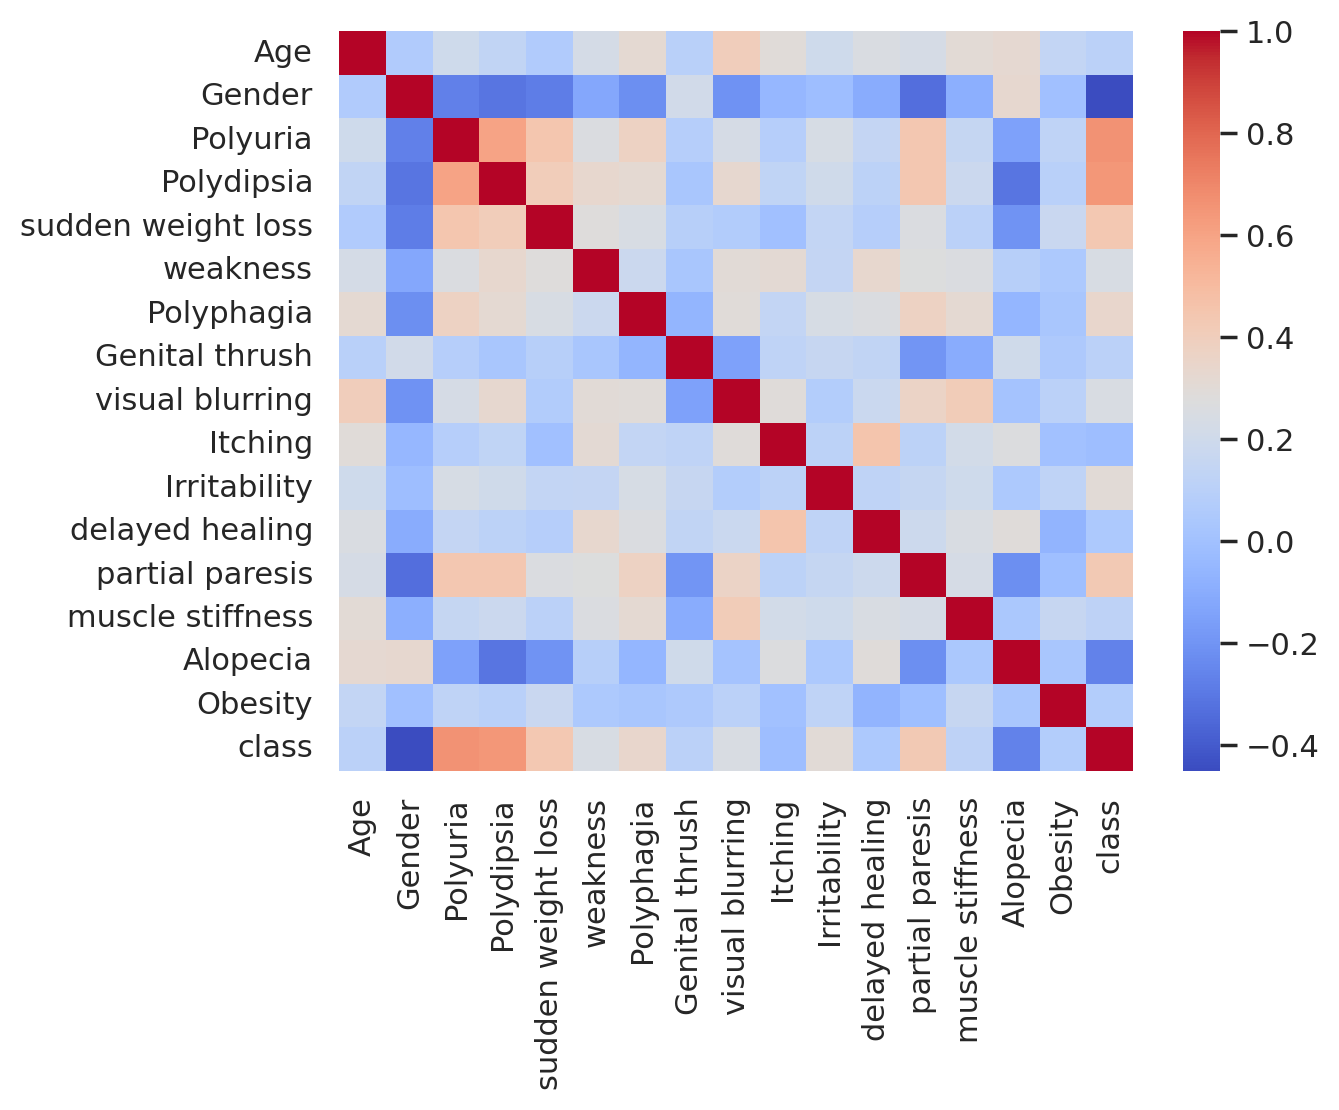

In [ ]:
# Mengonversi variabel biner menjadi numerik
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})  # Mengonversi Gender
df['Polyuria'] = df['Polyuria'].replace({'Yes': 1, 'No': 0})  # Mengonversi Polyuria
df['Polydipsia'] = df['Polydipsia'].replace({'Yes': 1, 'No': 0})  # Mengonversi Polydipsia
df['sudden weight loss'] = df['sudden weight loss'].replace({'Yes': 1, 'No': 0})  # Mengonversi Sudden weight loss
df['weakness'] = df['weakness'].replace({'Yes': 1, 'No': 0})  # Mengonversi Weakness
df['Polyphagia'] = df['Polyphagia'].replace({'Yes': 1, 'No': 0})  # Mengonversi Polyphagia
df['Genital thrush'] = df['Genital thrush'].replace({'Yes': 1, 'No': 0})  # Mengonversi Genital thrush
df['visual blurring'] = df['visual blurring'].replace({'Yes': 1, 'No': 0})  # Mengonversi Visual blurring
df['Itching'] = df['Itching'].replace({'Yes': 1, 'No': 0})  # Mengonversi Itching
df['Irritability'] = df['Irritability'].replace({'Yes': 1, 'No': 0})  # Mengonversi Irritability
df['delayed healing'] = df['delayed healing'].replace({'Yes': 1, 'No': 0})  # Mengonversi Delayed healing
df['partial paresis'] = df['partial paresis'].replace({'Yes': 1, 'No': 0})  # Mengonversi Partial paresis
df['muscle stiffness'] = df['muscle stiffness'].replace({'Yes': 1, 'No': 0})  # Mengonversi Muscle stiffness
df['Alopecia'] = df['Alopecia'].replace({'Yes': 1, 'No': 0})  # Mengonversi Alopecia
df['Obesity'] = df['Obesity'].replace({'Yes': 1, 'No': 0})  # Mengonversi Obesity
df['class'] = df['class'].replace({'Positive': 1, 'Negative': 0})  # Mengonversi Class

# Menghitung matriks korelasi
corr_matrix = df.corr()

# Menggambarkan matriks korelasi
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm')

***Penjelasan atau Deskripsi:***

**Warna merah** (walau tidak terlalu pekat pada indikator menunjukkan warna tersebut cenderung ke hubungan positif) **antara Polyuria dan class**, yang mengindikasikan bahwa gejala Polyuria memiliki korelasi positif dengan diabetes (target positif). Untuk variabel lain seperti **Polydipsia dan sudden weight loss** juga memiliki korelasi **positif dengan variabel target class**, yang mengindikasikan adanya keterkaitan antara gejala-gejala ini dengan risiko diabetes yang lebih tinggi. Sementara itu, variabel seperti **Gender** menunjukkan **korelasi yang sangat rendah terhadap class**, menandakan bahwa peran gender mungkin kurang relevan dalam prediksi risiko diabetes dalam dataset ini. Korelasi antar variabel gejala lainnya seperti **itching dan visual blurring cenderung lemah**, menunjukkan bahwa mereka mungkin memiliki peran yang lebih kecil secara individual terhadap prediksi risiko, atau mungkin berkontribusi secara tidak langsung.

**2.   Scatter Plot**

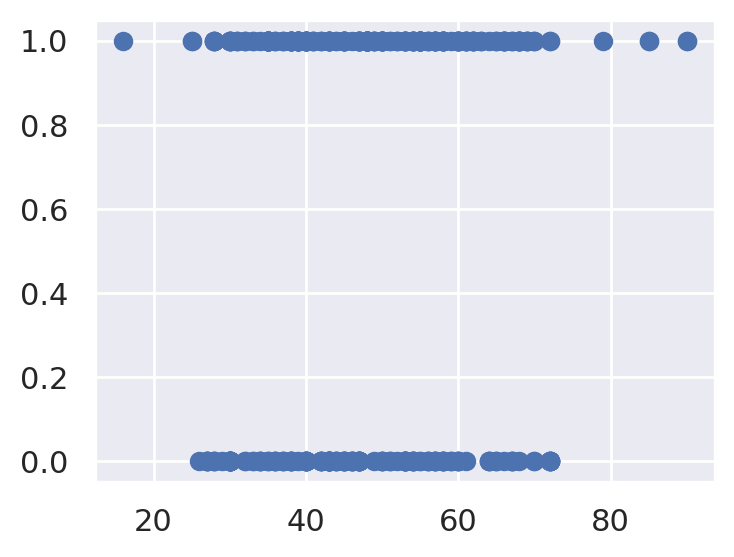

In [ ]:
# Mengonversi variabel biner menjadi numerik
df['class'] = df['class'].replace({'Positive': 1, 'Negative': 0})

# Mengatur ukuran figure
plt.figure(figsize=(4, 3))

plt.scatter(df["Age"], df["class"]);

***Penjelasan atau Deskripsi:***

Scatter plot diatas menunjukkan hubungan antara variabel Age dan class (yang telah diubah menjadi nilai numerik 0 dan 1). Karena class adalah variabel biner, semua titik pada sumbu Y hanya berada di dua posisi tetap: 0 atau 1. Hal ini menyebabkan data terlihat seperti dua garis horizontal di scatter plot, tanpa variasi vertikal yang biasanya ada dalam scatter plot umumnya. Visualisasi ini menunjukkan distribusi usia di setiap kelas, tetapi kurang efektif untuk menunjukkan pola karena data hanya berada di dua kategori (positif dan negatif) pada sumbu Y. Scatter plot akan lebih baik digunakan apabila terdapat variabel lain yang bersifat numerik. Sayangnya, pada dataset ini variabel atau fitur yang bersifat numerik hanya 1 yakni Age.

**3.   Joint Plot**

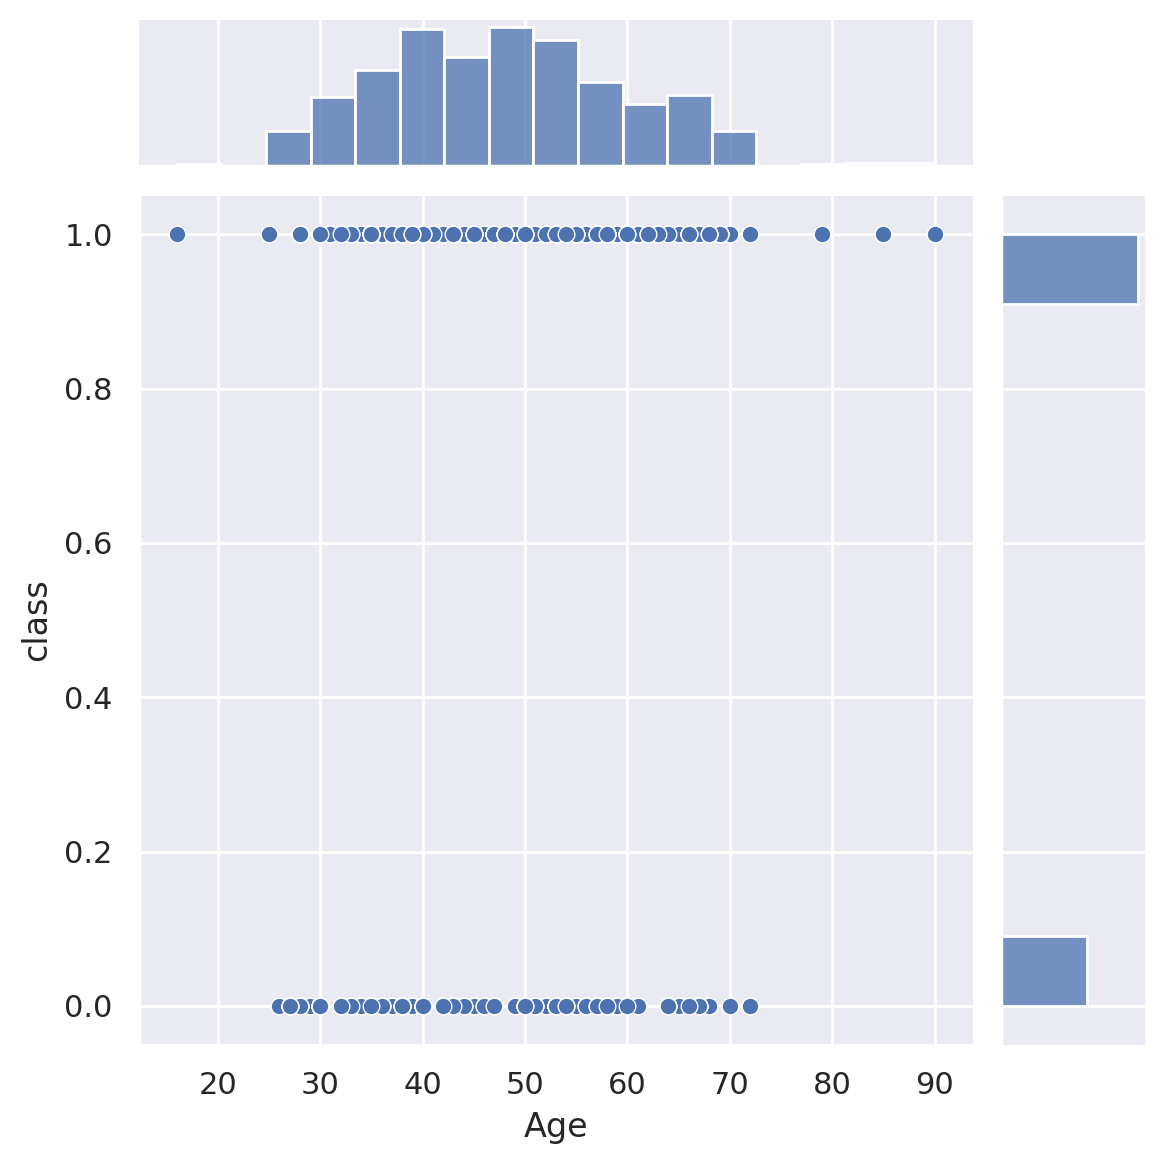

In [ ]:
sns.jointplot(x="Age", y="class", data=df, kind="scatter");

***Penjelasan atau Deskripsi:***

Joint Plot diatas menunjukkan hubungan antara variabel Age dan class (yang telah diubah menjadi nilai numerik 0 dan 1). Sama seperti scatter plot diatas sebelumnya, karena class adalah variabel biner, semua titik pada sumbu Y hanya berada di dua posisi tetap: 0 atau 1 sehingga menyebabkan data terlihat seperti dua garis horizontal tanpa variasi vertikal.

**4.   Scatterplot Matrix**

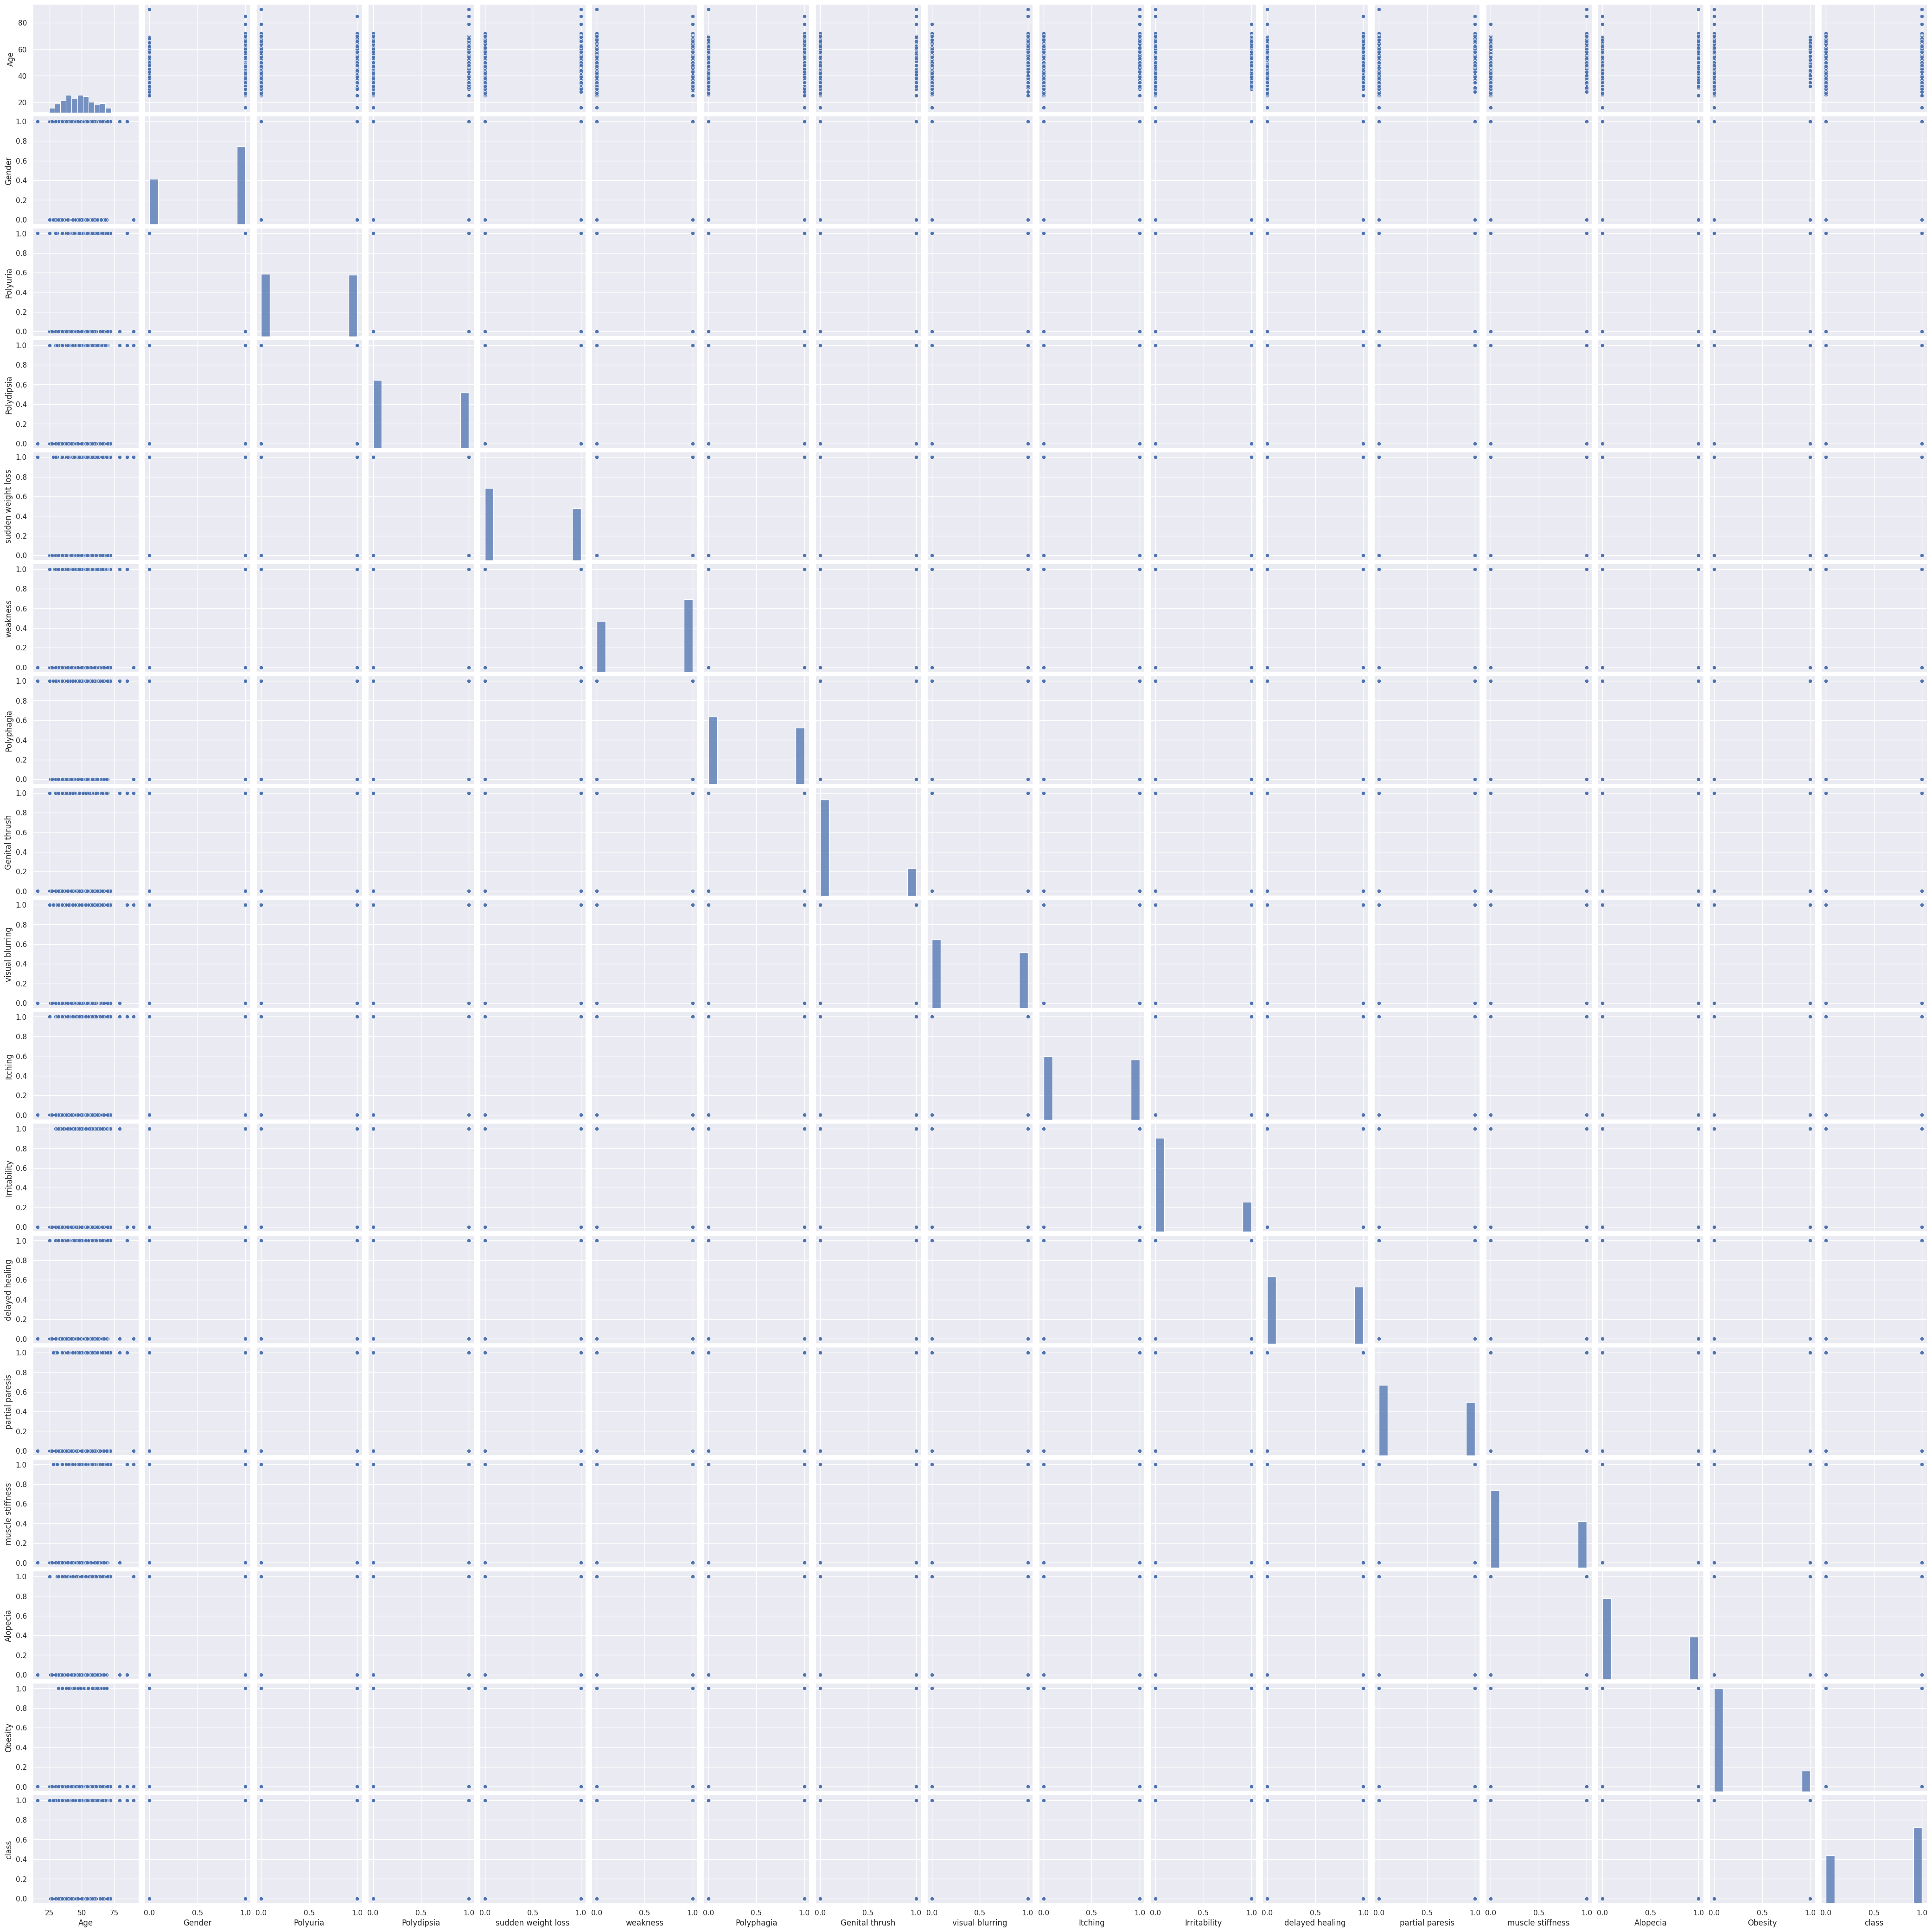

In [ ]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df);

***Penjelasan atau Deskripsi:***

Grafik diatas merupakan kumpulan gambar Scatter Plot antar variabel pada dataset yang menjadi satu berbentuk matriks, sehingga disebut Scatterplot Matrix. Sama seperti scatter plot sebelumnya, karena class adalah variabel biner, semua titik pada sumbu Y hanya berada di dua posisi tetap: 0 atau 1 sehingga menyebabkan data terlihat seperti dua garis horizontal tanpa variasi vertikal. Hal tersebut terjadi karena fitur atau variabel yang ada pada dataset didominasi oleh kategorikal.

###**3.2 	Quantitative vs. Categorical**


**1.   Scatter Plot**

In [ ]:
# Mengonversi variabel kembali ke kategorial
df['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})  # Mengonversi Gender
df['Polyuria'] = df['Polyuria'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Polyuria
df['Polydipsia'] = df['Polydipsia'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Polydipsia
df['sudden weight loss'] = df['sudden weight loss'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Sudden weight loss
df['weakness'] = df['weakness'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Weakness
df['Polyphagia'] = df['Polyphagia'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Polyphagia
df['Genital thrush'] = df['Genital thrush'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Genital thrush
df['visual blurring'] = df['visual blurring'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Visual blurring
df['Itching'] = df['Itching'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Itching
df['Irritability'] = df['Irritability'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Irritability
df['delayed healing'] = df['delayed healing'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Delayed healing
df['partial paresis'] = df['partial paresis'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Partial paresis
df['muscle stiffness'] = df['muscle stiffness'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Muscle stiffness
df['Alopecia'] = df['Alopecia'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Alopecia
df['Obesity'] = df['Obesity'].replace({1: 'Yes', 0: 'No'})  # Mengonversi Obesity
df['class'] = df['class'].replace({1: 'Positive', 0: 'Negative'})  # Mengonversi Class

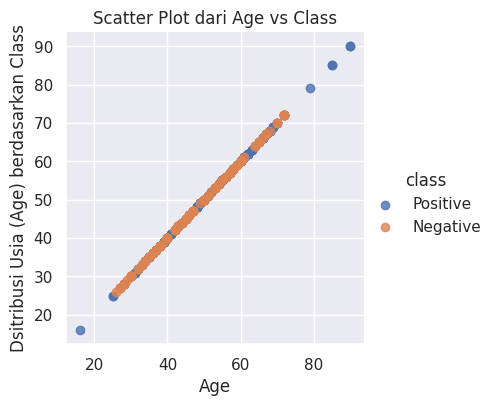

In [ ]:
#Scatter plot Age vs. Class
sns.lmplot(
    x="Age", y="Age", data=df, hue="class", fit_reg=False, height=4, aspect=1
    )

# Judul dan label sumbu
plt.title("Scatter Plot dari Age vs Class")
plt.xlabel("Age")
plt.ylabel("Dsitribusi Usia (Age) berdasarkan Class")
plt.show()

***Penjelasan atau Deskripsi:***

Scatter plot diatas menunjukkan hubungan antara variabel Age dan class secara kuantitatif dan kategorial. Seperti pada penjelasan-penjelasan sebelumnya, visualisasi di atas tidak terlihat seperti scatter plot pada umumnya dikarenakan variabel numerik hanya dimiliki oleh Age.

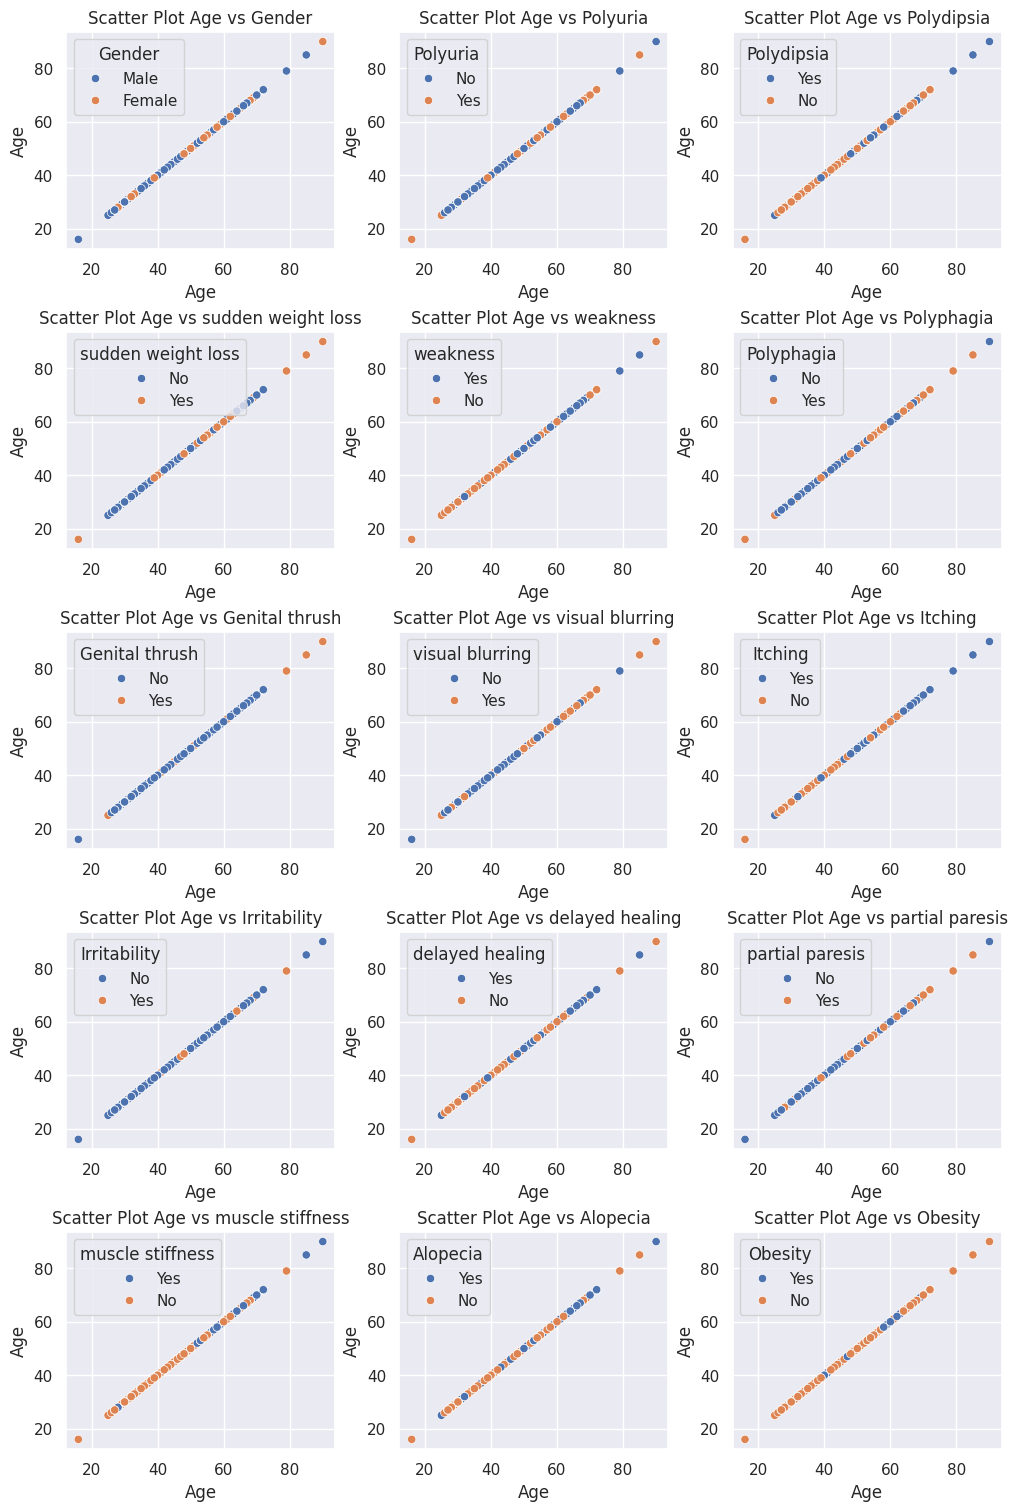

In [ ]:
# Daftar variabel kategorikal
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
                        'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                        'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                        'muscle stiffness', 'Alopecia', 'Obesity']

# Menentukan ukuran grid (untuk 3 kolom)
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang diperlukan

# Membuat subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows), constrained_layout=True)

# Plot setiap scatter plot di grid
for i, feature in enumerate(categorical_features):
    row = i // n_cols
    col = i % n_cols
    sns.scatterplot(x='Age', y='Age', hue=feature, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Scatter Plot Age vs {feature}')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Age')

# Menghapus axis kosong jika jumlah plot tidak merata dengan grid
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])  # Menghapus axis yang kosong di grid

plt.show()


***Penjelasan atau Deskripsi:***

Scatter plot diatas menunjukkan hubungan antara variabel Age dan variabel lainnya secara kuantitatif vs kategorial. Seperti pada penjelasan-penjelasan sebelumnya, visualisasi di atas tidak terlihat seperti scatter plot pada umumnya dikarenakan variabel numerik hanya dimiliki oleh Age.

**2.   Swarm Plot**

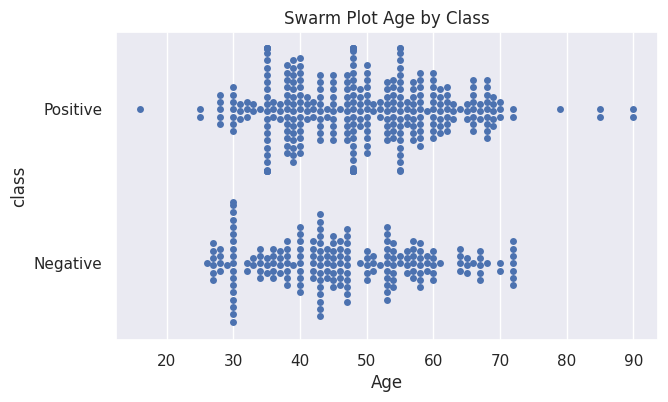

In [ ]:
plt.figure(figsize=(7, 4))

sns.swarmplot(
    x="Age",
    y="class",
    data=df,
)

# Menambahkan judul dan label sumbu
plt.title("Swarm Plot Age by Class")
plt.xlabel("Age")
plt.ylabel("class")
plt.show()

***Penjelasan atau Deskripsi:***

Swarm plot diatas menunjukkan hubungan antara variabel Age dan variabel class secara kuantitatif vs kategorial. Swarm plot dapat dijadikan sebagai opsi untuk memvisualisasikan hubungan antar variabel yang lebih informatif dan menarik, dimana distribusi data digambarkan secara menyeluruh dan tidak saling tumpang tindih.

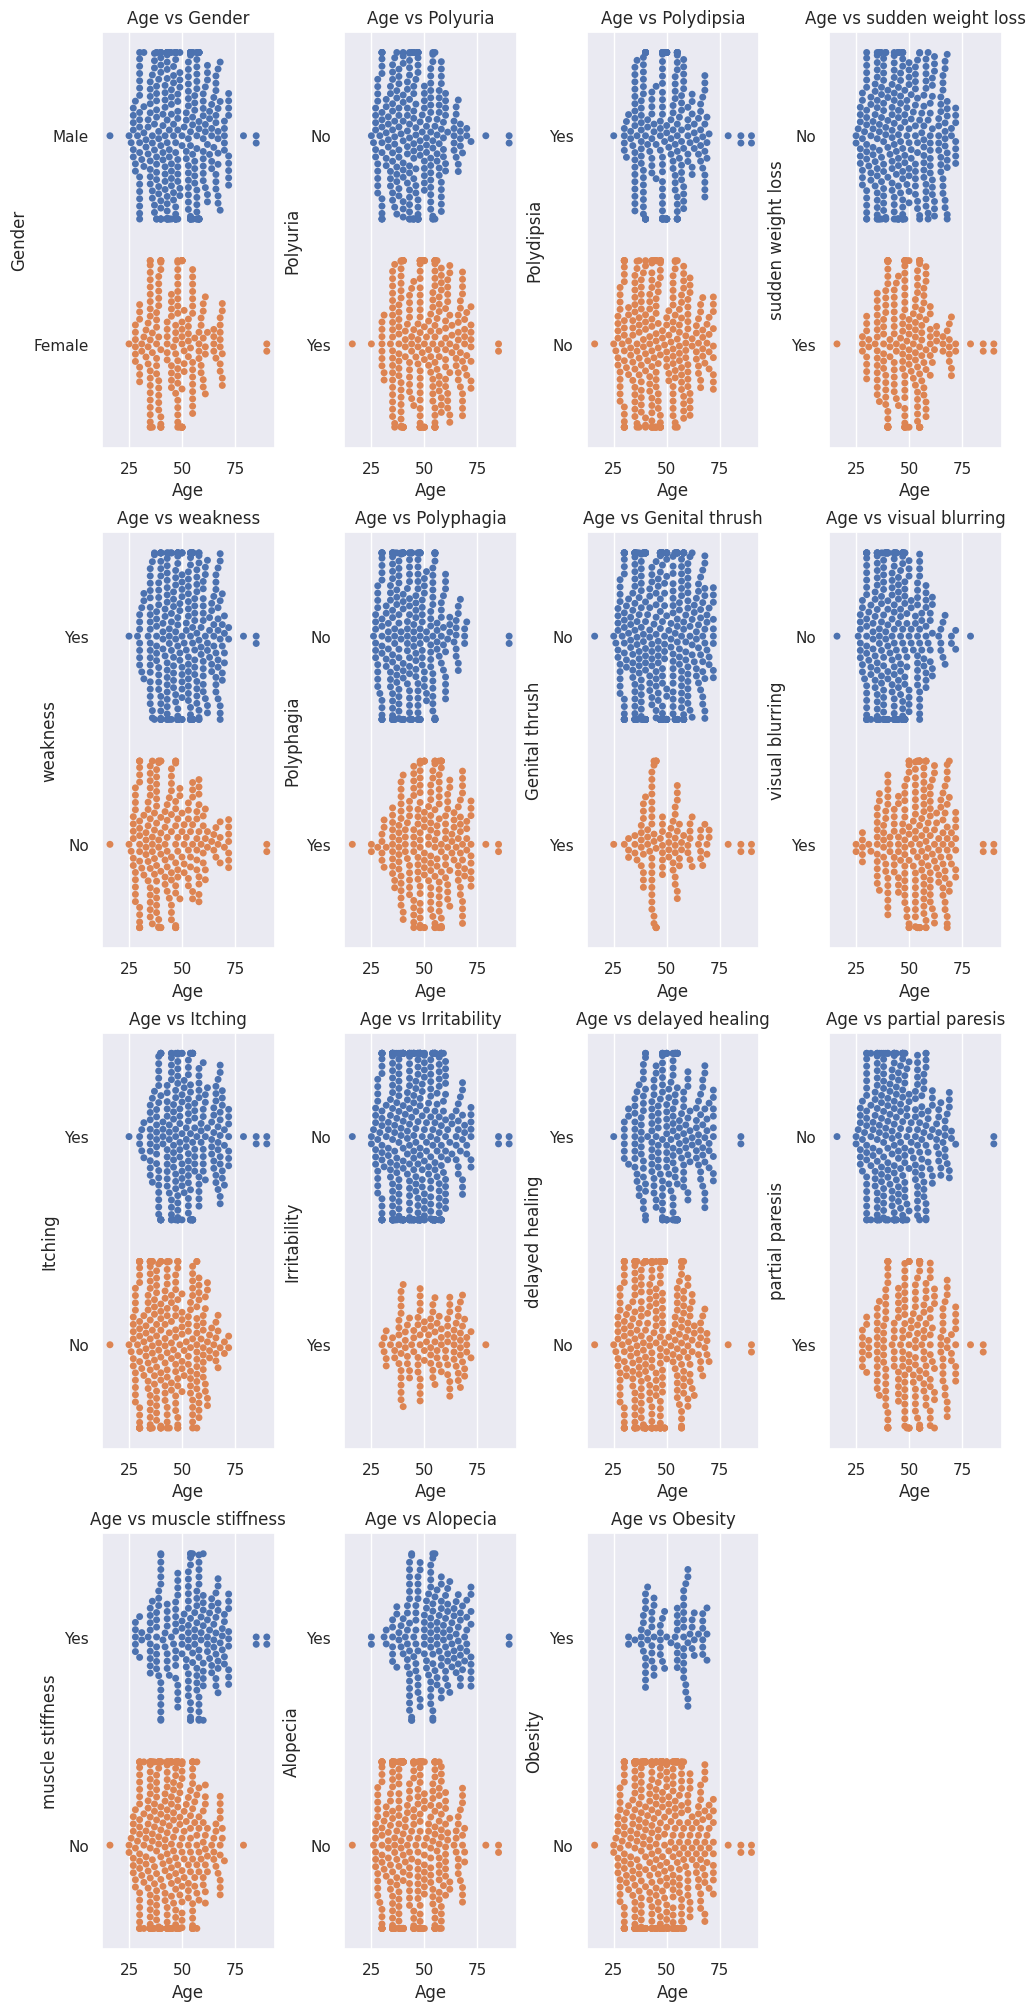

In [ ]:
n_cols = 4
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # Menghitung jumlah baris yang diperlukan

# Membuat subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows), constrained_layout=True)

# Plot setiap scatter plot di grid
for i, feature in enumerate(categorical_features):
    row = i // n_cols
    col = i % n_cols
    sns.swarmplot(x='Age', y=feature, data=df, hue=feature, ax=axes[row, col])
    axes[row, col].set_title(f'Age vs {feature}')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel(feature)

# Menghapus axis kosong jika jumlah plot tidak merata dengan grid
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])  # Menghapus axis yang kosong di grid

plt.show()

***Penjelasan atau Deskripsi:***

Swarm plot diatas menunjukkan hubungan antara variabel Age dan variabel lainnya yang ada di dataset secara kuantitatif vs kategorial.

**3.   Box Plot**

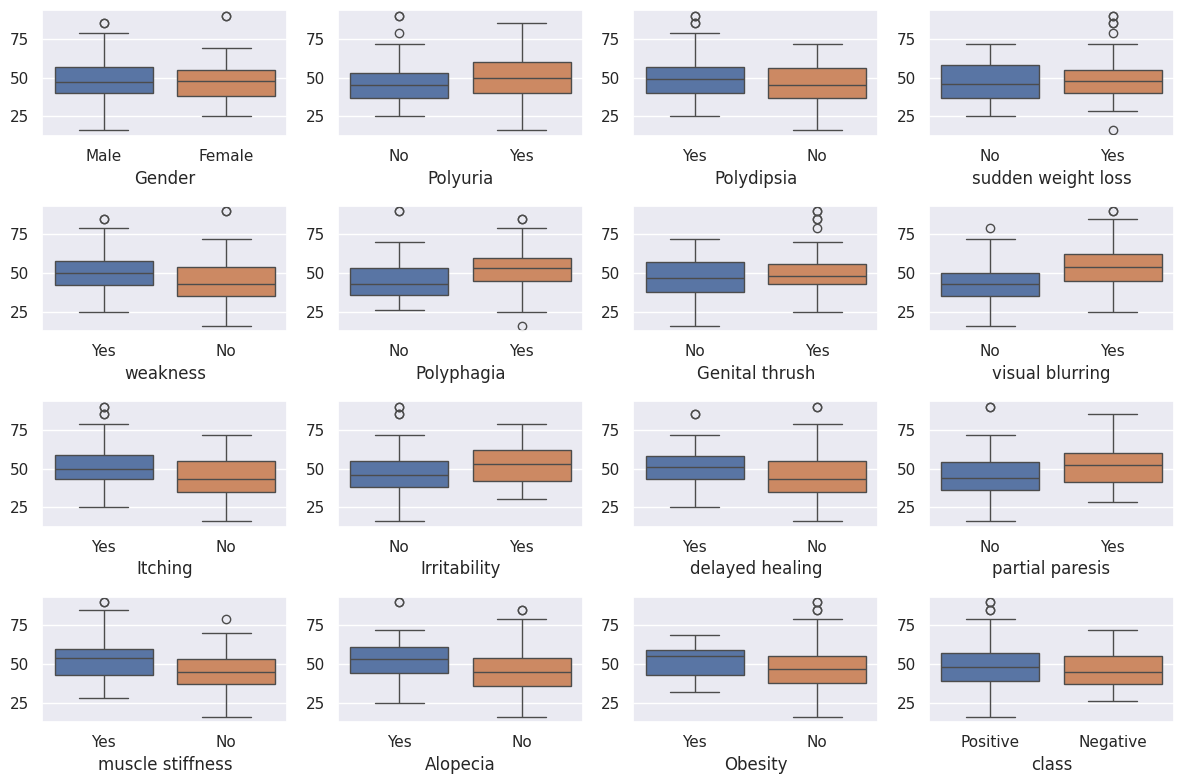

In [ ]:
#visualisasi box plots (Quantitative vs Categorial)
# Daftar variabel kategorikal
cat_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
                'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Menentukan jumlah baris yang diperlukan
n_rows = int(np.ceil(len(cat_features) / 4))

fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(12, 8))

axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    sns.boxplot(x=feature, y="Age", data=df, hue=feature, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("")

for i in range(len(cat_features), n_rows * 4):
    fig.delaxes(axes[i])

fig.tight_layout();

***Penjelasan atau Deskripsi:***

Boxplot di atas menunjukkan distribusi usia pasien terhadap berbagai variabel atau fitur gejala dan kondisi dalam dataset risiko diabetes, termasuk gender, gejala (polyuria, polydipsia, dll.), dan hasil diagnosis (positif/negatif). Rentang usia pasien berkisar antara sekitar 20 hingga 75 tahun, dengan mayoritas usia berada di sekitar 50 tahun. Pada setiap fitur, distribusi usia antara kelompok dengan dan tanpa gejala cukup serupa, meskipun terdapat beberapa perbedaan kecil di median dan variasi antar kelompok. Beberapa fitur menunjukkan outliers yang menonjol, terutama pada gejala seperti sudden weight loss, visual blurring, dan Obesity, yang dapat mengindikasikan pasien dengan karakteristik usia yang tidak umum pada kelompok tersebut.

**4. Violin Plot**

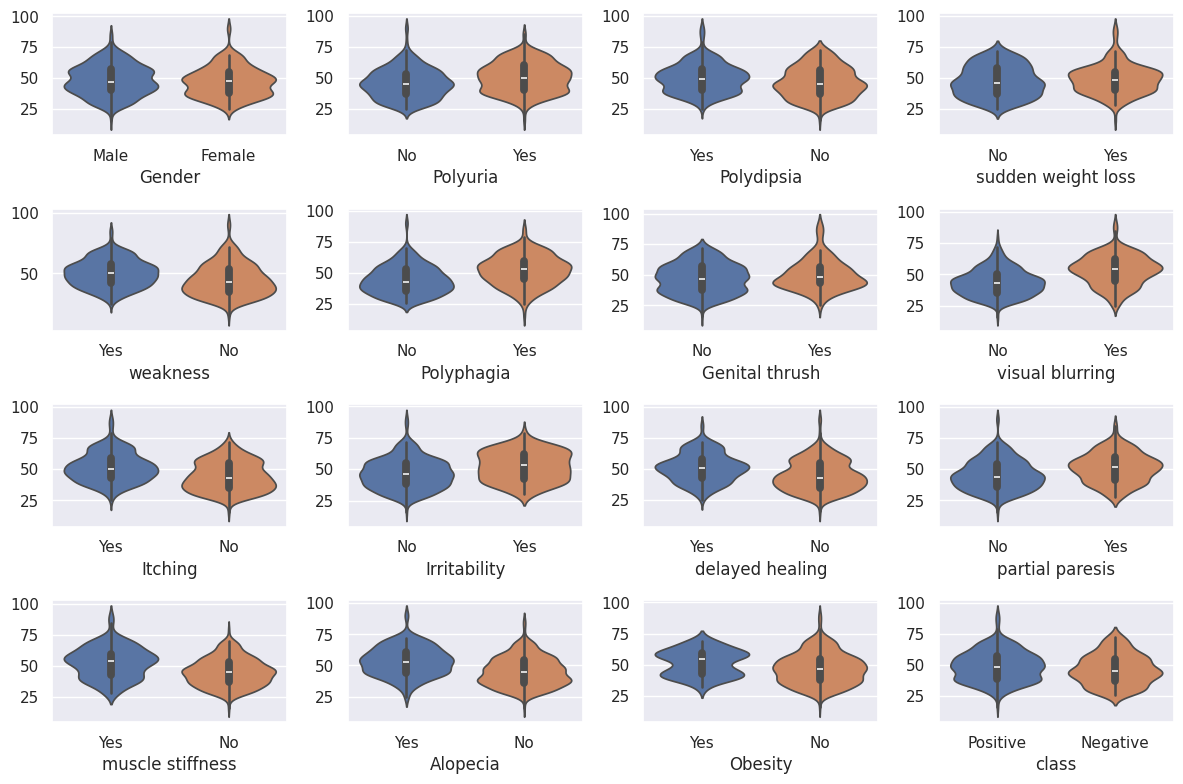

In [ ]:
#visualisasi violin plots (Quantitative vs Categorial)
# Daftar variabel kategorikal
cat_features = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
                'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                'muscle stiffness', 'Alopecia', 'Obesity', 'class']

# Menentukan jumlah baris yang diperlukan
n_rows = int(np.ceil(len(cat_features) / 4))

fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(12, 8))

axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    sns.violinplot(x=feature, y="Age", data=df, hue=feature, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("")

for i in range(len(cat_features), n_rows * 4):
    fig.delaxes(axes[i])

fig.tight_layout();

***Penjelasan atau Deskripsi:***

Grafik diatas merupakan visualisasi distribusi dan densitas variabel Age pada berbagai fitur kategorikal lainnya yang ada pada dataset. Setiap plot menunjukkan variasi distribusi usia, di mana bentuk violin mengindikasikan kepadatan data pada rentang usia tertentu. Misalnya, beberapa kategori seperti Polyuria dan Genital thrush menunjukkan distribusi yang berbeda antara "Yes" dan "No", dengan variasi kepadatan yang terlihat di berbagai usia. Penggunaan warna biru untuk "Yes" dan oranye untuk "No" membantu membedakan kategori, sehingga pola distribusi antar kategori lebih mudah dikenali. Violin plot ini memberikan informasi tambahan terkait distribusi data yang tidak ditampilkan oleh box plot biasa.

###**3.3 	Categorical vs. Categorical**


**1.   Count Plot**


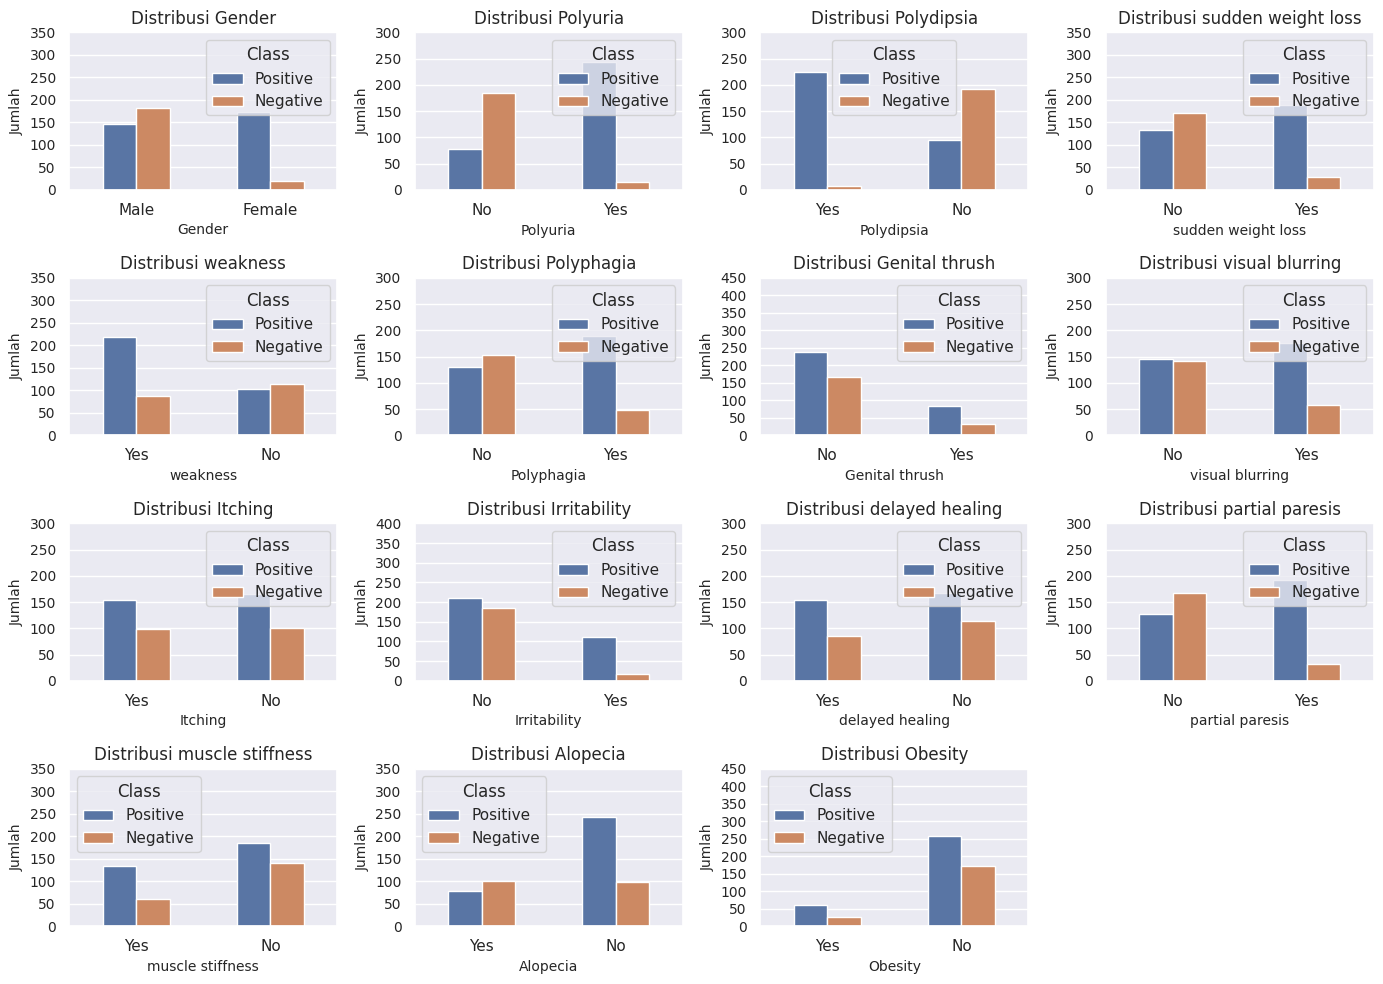

In [ ]:
category = [
    'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
    'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
    'Itching', 'Irritability', 'delayed healing', 'partial paresis',
    'muscle stiffness', 'Alopecia', 'Obesity'
]

# Menentukan jumlah baris yang diperlukan
n_rows = int(np.ceil(len(category) / 4))

# Mengatur ukuran figure
fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(14, 10))

# Mengubah axes menjadi array satu dimensi
axes = axes.flatten()

# Loop untuk membuat countplot
for idx, feature in enumerate(category):
    ax = axes[idx]
    sns.countplot(x=feature, data=df, hue="class", ax=ax, width=0.5)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Jumlah", fontsize=10)
    ax.set_title(f'Distribusi {feature}', fontsize=12)
    ax.legend(title='Class')

    # Mengatur rentang sumbu Y dan interval label
    max_count = df[feature].value_counts().max()
    ax.set_yticks(np.arange(0, max_count + 50, 50))
    ax.set_yticklabels(np.arange(0, max_count + 50, 50), fontsize=10)

# Menghapus axes yang tidak terpakai
for i in range(len(category), n_rows * 4):
    fig.delaxes(axes[i])

# Menyesuaikan layout
fig.tight_layout()
plt.show()

***Penjelasan atau Deskripsi:***

Gambar-gambar diatas merupakan grafik count plot yang menunjukkan distribusi beberapa gejala diabetes terkait dengan hasil diagnosis (positif atau negatif). Secara umum, terlihat bahwa beberapa gejala seperti polyuria, polydipsia, sudden weight loss, dan genital thrush lebih sering muncul pada pasien dengan hasil diagnosis positif, menunjukkan potensi korelasi kuat dengan diabetes. Sementara itu, gejala seperti alopecia dan obesity tidak menunjukkan perbedaan signifikan antara kedua kelas, mengindikasikan kemungkinan korelasi yang lebih lemah. Pada gejala lainnya, seperti weakness, itching, dan delayed healing, terdapat perbedaan tetapi tidak sejelas gejala utama yang terkait erat dengan diabetes. Secara keseluruhan, analisis ini menggarisbawahi pentingnya beberapa gejala sebagai indikator kuat untuk deteksi dini risiko diabetes